In [69]:
#Set up dependencies 

from config import (weather_api_key, g_key)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import json

#Set up the range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Set the empty lists for cities, latitude, longitude 

cities = []
lat_lng = []

#Create the list by creating a set of random lat and lng combinations
lat = np.random.uniform(low=-90.00, high=90.00, size=1500)
lng = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lng = zip(lat, lng)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add new city names, and skip if already in the list 
    if city not in cities:
        cities.append(city)

#Print the city count
#The number will always be different due the list being randomly generated everytime
len(cities)

619

In [3]:
#Make your API call

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=2878a798cfb691dad6060a6e56d91fe3'

In [4]:
#weather_response = requests.get(target_url)
#weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4, sort_keys=True))

In [5]:
#Collect the data on each city in the dataset
#Set up the empty lists to hold values 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0 

#Create a for loop to go through data and fill the lists

for city in cities:
    response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_name.append(weather_json["city"]["name"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        wind_speed.append(weather_json["list"][0]["wind"]["speed"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("No Record Found") 
        pass
        
print("---------------")
print("Data Retrieval Complete")
print("---------------")

Processing record 1 of Set 1 | arraial do cabo
Processing record 2 of Set 1 | punta arenas
Processing record 3 of Set 1 | half moon bay
Processing record 4 of Set 1 | jacqueville
Processing record 5 of Set 1 | busselton
Processing record 6 of Set 1 | strezhevoy
Processing record 7 of Set 1 | torbay
Processing record 8 of Set 1 | new norfolk
Processing record 9 of Set 1 | halifax
Processing record 10 of Set 1 | llata
Processing record 11 of Set 1 | jumla
Processing record 12 of Set 1 | okha
Processing record 13 of Set 1 | ushuaia
Processing record 14 of Set 1 | jiangyou
Processing record 15 of Set 1 | east london
Processing record 16 of Set 1 | alofi
Processing record 17 of Set 1 | mar del plata
Processing record 18 of Set 1 | ossora
Processing record 19 of Set 1 | port alfred
Processing record 20 of Set 1 | rikitea
Processing record 21 of Set 1 | abalak
Processing record 22 of Set 1 | severo-kurilsk
Processing record 23 of Set 1 | saskylakh
Processing record 24 of Set 1 | cabo san luca

Processing record 189 of Set 1 | adrar
Processing record 190 of Set 1 | hithadhoo
Processing record 191 of Set 1 | port hardy
Processing record 192 of Set 1 | gornopravdinsk
No Record Found
Processing record 193 of Set 1 | okhotsk
Processing record 194 of Set 1 | changji
Processing record 195 of Set 1 | yellowknife
Processing record 196 of Set 1 | kawalu
Processing record 197 of Set 1 | cherskiy
Processing record 198 of Set 1 | bonavista
Processing record 199 of Set 1 | bengkulu
Processing record 200 of Set 1 | san patricio
Processing record 201 of Set 1 | naze
Processing record 202 of Set 1 | zaria
Processing record 203 of Set 1 | contamana
Processing record 204 of Set 1 | nikolskoye
Processing record 205 of Set 1 | bani
Processing record 206 of Set 1 | rocha
No Record Found
Processing record 207 of Set 1 | palmer
Processing record 208 of Set 1 | calama
Processing record 209 of Set 1 | kahului
Processing record 210 of Set 1 | guerrero negro
Processing record 211 of Set 1 | puerto cabe

Processing record 378 of Set 1 | aras
Processing record 379 of Set 1 | kitimat
Processing record 380 of Set 1 | limbang
Processing record 381 of Set 1 | almaty
No Record Found
Processing record 382 of Set 1 | manadhoo
Processing record 383 of Set 1 | huallanca
Processing record 384 of Set 1 | trudarmeyskiy
Processing record 385 of Set 1 | portland
Processing record 386 of Set 1 | mezen
Processing record 387 of Set 1 | skovorodino
No Record Found
Processing record 388 of Set 1 | jijiang
Processing record 389 of Set 1 | boli
Processing record 390 of Set 1 | ozark
Processing record 391 of Set 1 | chuy
Processing record 392 of Set 1 | boden
Processing record 393 of Set 1 | kaliua
Processing record 394 of Set 1 | port-gentil
Processing record 395 of Set 1 | komsomolskiy
Processing record 396 of Set 1 | avera
Processing record 397 of Set 1 | cedar city
Processing record 398 of Set 1 | kenitra
Processing record 399 of Set 1 | kosa
Processing record 400 of Set 1 | bukoba
Processing record 401 

Processing record 569 of Set 1 | sterling
Processing record 570 of Set 1 | carovigno
---------------
Data Retrieval Complete
---------------


In [6]:
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp,
                           "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
                           "Country": country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,75.36,84,29,6.20,BR,1599858000
1,Punta Arenas,-53.1500,-70.9167,45.09,56,87,16.91,CL,1599858000
2,Half Moon Bay,37.4636,-122.4286,66.70,71,49,11.32,US,1599858000
3,Jacqueville,5.2052,-4.4146,75.43,92,22,9.19,CI,1599858000
4,Busselton,-33.6500,115.3333,48.54,78,0,1.77,AU,1599858000


In [7]:
#Find the amount of cities again
city_count2 = len(weather_df)
print(f"There are now {city_count2} cities in the dataframe.")

There are now 570 cities in the dataframe.


In [8]:
#Send data to output data folder
weather_df.to_csv(r'output_data\my_weather_df.csv')

In [9]:
#Find all the statistical values for the dataframe 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.289162,20.501659,67.086070,69.226316,51.026316,7.742456,1.599858e+09
std,33.520382,92.294193,14.855611,20.330564,34.909137,5.358228,0.000000e+00
min,-54.800000,-175.200000,27.190000,9.000000,0.000000,0.360000,1.599858e+09
25%,-8.886850,-57.703975,53.802500,59.250000,20.000000,3.620000,1.599858e+09
50%,24.794150,21.844300,69.990000,74.000000,52.000000,6.640000,1.599858e+09
75%,48.038525,105.873200,77.577500,84.000000,84.750000,10.320000,1.599858e+09
max,78.218600,179.316700,104.090000,100.000000,100.000000,37.600000,1.599858e+09


In [11]:
#Time to remove outliers with humidty of 100%
humid_100 = weather_df[weather_df["Humidity"]== 100].index

weather_df = weather_df.drop(humid_100, inplace=True)

In [16]:
#Find the amount of cities again
city_count3 = len(weather_df)
print(f"There are now {city_count3} cities in the dataframe.")

There are now 569 cities in the dataframe.


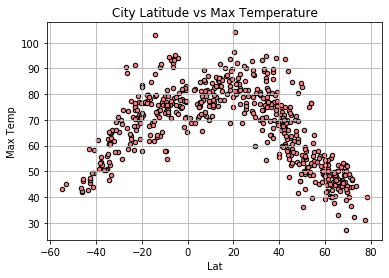

In [74]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Max Temperature 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", title = "City Latitude vs Max Temperature",
                                color = "lightcoral", edgecolor = "black", grid = True)
                                
#Save the chart to the output folder
plt.savefig("output_data/lat_vs_temp")

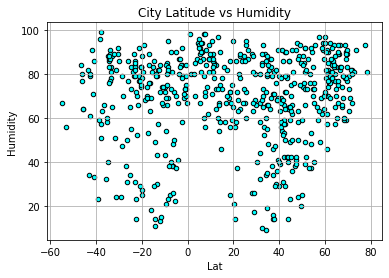

In [83]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Humidity
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", title = "City Latitude vs Humidity",
                                color = "aqua", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_humidity")

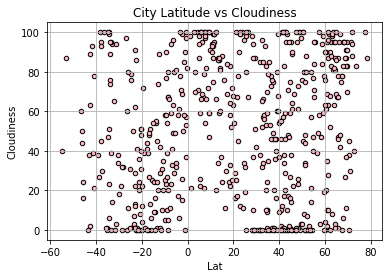

In [79]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Cloudiness 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = "City Latitude vs Cloudiness",
                                color = "lightpink", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_clouds")

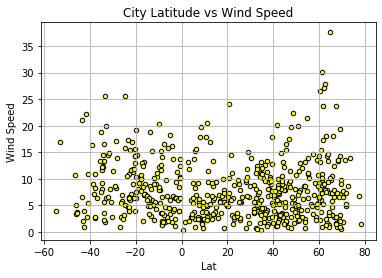

In [80]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Wind Speed
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = "City Latitude vs Wind Speed",
                                color = "yellow", edgecolor = "black", grid = True)
                                

plt.savefig("output_data/lat_vs_wind")